This is an data exploration [Loan Prediction III contest](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/) 

## About Company

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

## Problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In this problem, we have to predict the Loan Status of a person based on his/ her profile.





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1



# import my method from the source code
#%aimport preprocess.build_features
#from preprocess.build_features import remove_invalid_data


In [3]:
import os
default_path = os.getcwd()
print (default_path) # Prints the working directory
path = "D:/Python-projects/LoanPrediction3/"
os.chdir(path)

D:\Python-projects\LoanPrediction3


* Read the data and and look at them

In [4]:
df_train = pd.read_csv('data/raw/train_u6lujuX_CVtuZ9i.csv', index_col=0)
df_train.shape


(614, 12)

In [5]:
pd.set_option('display.max.column', None)
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
display(df_train.describe())

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# 2. Prepare the Data

## 2.1.Data Description



### 2.1.1 Describe the extent of the data that is available

Variable | Description
-------- | -------------
Loan_ID | Unique Loan ID
Gender | Male/ Female
Married | Applicant married (Y/N)
Dependents | Number of dependents
Education | Applicant Education (Graduate/ Under Graduate)
Self_Employed | Self employed (Y/N)
ApplicantIncome | Applicant income
CoapplicantIncome | Coapplicant income
LoanAmount | Loan amount in thousands
Loan_Amount_Term | Term of loan in months
Credit_History | credit history meets guidelines
Property_Area | Urban/ Semi Urban/ Rural
Loan_Status| Loan approved (Y/N)

### 2.1.2 Describe data that is not available but is desirable
Let’s check if the data has any missing values in numerical variables and separate this quantity by fields:

In [7]:
df_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 2.1.3. Visualize numerical data (Distribution analysis):

ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term


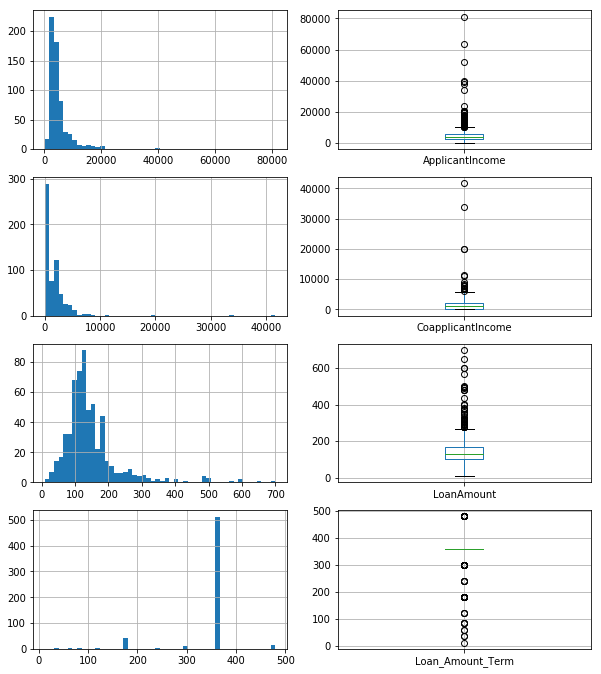

In [8]:
fig1 = plt.figure(figsize=(10,24))
ax1 = fig1.add_subplot(8,2,1)
df_train['ApplicantIncome'].hist(bins=50)
ax2 = fig1.add_subplot(8,2,2)
df_train.boxplot(column='ApplicantIncome')
ax3 = fig1.add_subplot(8,2,3)
df_train['CoapplicantIncome'].hist(bins=50)
ax4 = fig1.add_subplot(8,2,4)
df_train.boxplot(column='CoapplicantIncome')
ax5 = fig1.add_subplot(8,2,5)
df_train['LoanAmount'].hist(bins=50)
ax6 = fig1.add_subplot(8,2,6)
df_train.boxplot(column='LoanAmount')
ax7 = fig1.add_subplot(8,2,7)
df_train['Loan_Amount_Term'].hist(bins=50)
ax8 = fig1.add_subplot(8,2,8)
df_train.boxplot(column='Loan_Amount_Term')

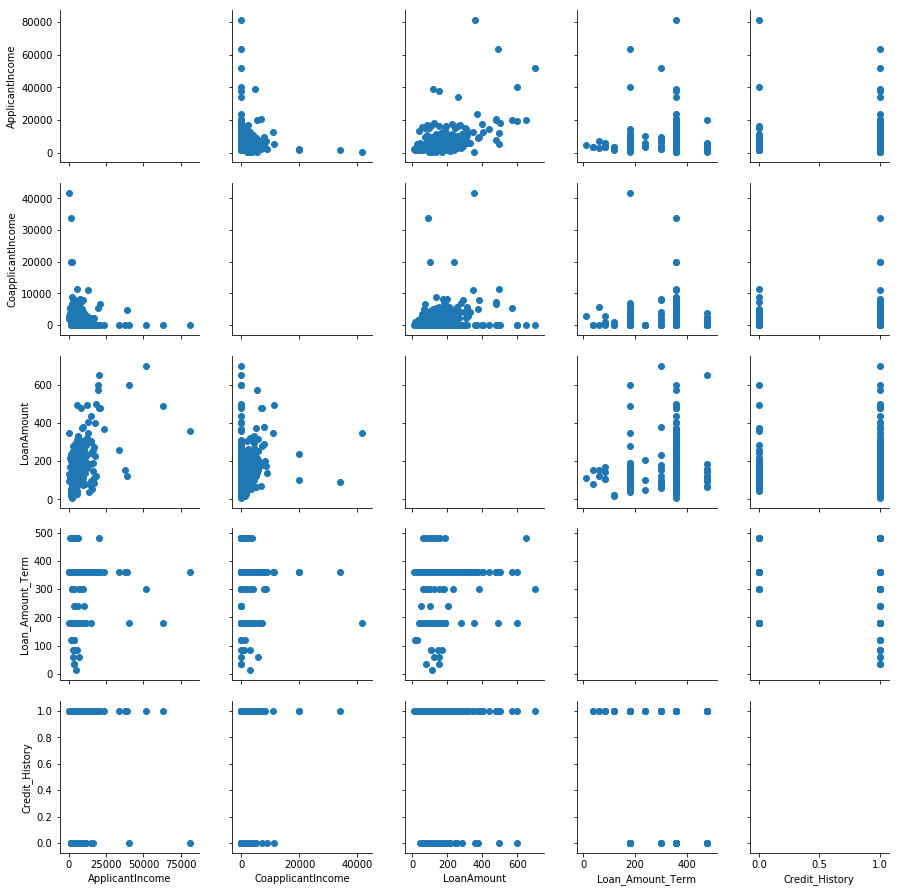

In [9]:
g = sns.PairGrid(df_train)
# g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)


### 2.1.4. Categorical variable analysis: 

Gender,	Married, Dependents, Education, Self_Employed, Credit_History, Property_Area

Text(0.5,1,'Property_Area')

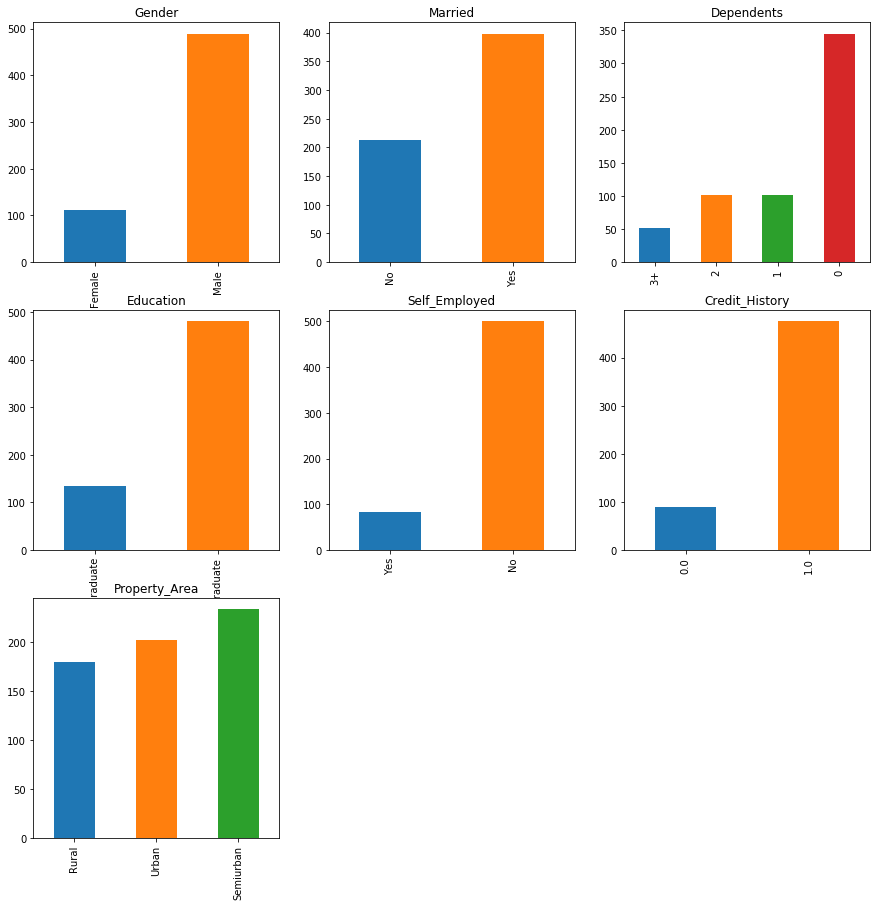

In [10]:
fig2 = plt.figure(figsize=(15,15))

ax1 = fig2.add_subplot(3,3,1)
gender_temp = df_train['Gender'].value_counts(ascending=True)
gender_temp.plot(kind='bar')
ax1.set_title("Gender")

ax2 = fig2.add_subplot(3,3,2)
married_temp = df_train['Married'].value_counts(ascending=True)
married_temp.plot(kind='bar')
ax2.set_title("Married")

ax3 = fig2.add_subplot(3,3,3)
dependents_temp = df_train['Dependents'].value_counts(ascending=True)
dependents_temp.plot(kind='bar')
ax3.set_title("Dependents")

ax4 = fig2.add_subplot(3,3,4)
education_temp = df_train['Education'].value_counts(ascending=True)
education_temp.plot(kind='bar')
ax4.set_title("Education")

ax5 = fig2.add_subplot(3,3,5)
self_employed_temp = df_train['Self_Employed'].value_counts(ascending=True)
self_employed_temp.plot(kind='bar')
ax5.set_title("Self_Employed")

ax6 = fig2.add_subplot(3,3,6)
credit_history_temp = df_train['Credit_History'].value_counts(ascending=True)
credit_history_temp.plot(kind='bar')
ax6.set_title("Credit_History")

ax7 = fig2.add_subplot(3,3,7)
property_area_temp = df_train['Property_Area'].value_counts(ascending=True)
property_area_temp.plot(kind='bar')
ax7.set_title("Property_Area")

In [11]:
temp1 = df_train['Credit_History'].value_counts(ascending=True)
temp2 = df_train.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:')
print(temp1)

print ('\nProbability of getting loan for each Credit History class:')
print(temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


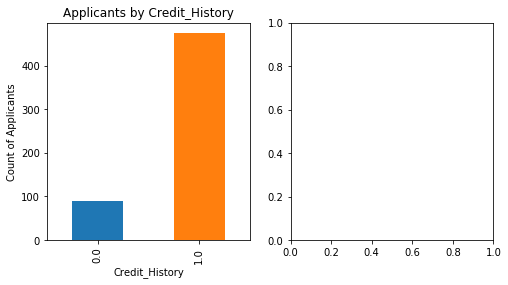

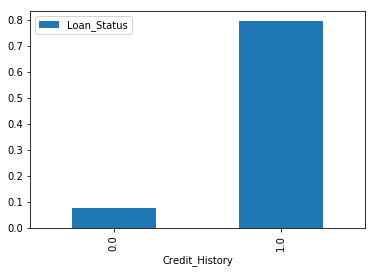

In [12]:
fig3 = plt.figure(figsize=(8,4))
ax1 = fig3.add_subplot(1,2,1)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')


ax2 = fig3.add_subplot(1,2,2)
temp2.plot(kind = 'bar')
#ax2.set_xlabel('Credit_History')
#ax2.set_ylabel('Probability of getting loan')
#ax2.set_title("Probability of getting loan by credit history")


## 2.2 Data Processing

### 2.2.1. Make features space


In [13]:
# set path of project
default_path = os.getcwd()
print (default_path) # Prints the working directory
path = "D:/Python-projects/LoanPrediction3"
os.chdir(path)
print(path)

'''
Clear source datasets, construct new variables, drop correlated features 
and save final datasets as train_ready.csv and test_ready.csv in folder /data/interim
'''

from src.data.make_dataset import make_data
input_filepath, output_filepath = r"data/raw/", r"data/interim/"
make_data(input_filepath, output_filepath)
display("Ready")







D:\Python-projects\LoanPrediction3
D:/Python-projects/LoanPrediction3


Sizes (614, 12) (367, 11)
Outcome dispersion:
 Y    422
N    192
Name: Loan_Status, dtype: int64
(981, 11)
Start  make_features
Start  make_null_features
Finish  make_null_features
Start  make_calc_features
Finish  make_calc_features
Start  make_logs
Finish  make_logs
Start  make_str_features
Finish  make_str_features
Start  drop_correlated_features
Columns were droped:  ['TotalIncome', 'DTI_month', 'DTI_month_person', 'LOG_LoanAmount', 'LOG_Loan_Amount_Term', 'LOG_TotalIncome', 'LOG_TotalIncomePerson', 'LOG_LoanAmountMonth', 'LOG_DTI', 'LOG_DTI_person', 'LOG_DTI_month', 'LOG_DTI_month_person', 'Gender_Male', 'Married_Yes', 'Dependents_0', 'Education_Not Graduate', 'Self_Employed_Yes']
Finish  drop_correlated_features
Finish  make_features
(614, 39) (367, 39)


'Ready'

# 3. Building a Predictive Models

## 3.1.Spot Check Algorithms

In [59]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
import src.models.eval_model as ev
from src.features.select_features import select_features_rfe, select_features_sfs
from sklearn.ensemble import RandomForestClassifier

seed = 1234567
n_features=20
data_tmp = pd.read_csv('data/interim/train_ready.csv', index_col=0)
clf = RandomForestClassifier(n_estimators=100, random_state=seed)
# best_features_idx = select_features_sfs(data_tmp, clf, k_features=n_features, 
#                                                       forward=True, 
#                                                       floating=False, 
#                                                       scoring='accuracy',  
#                                                       verbose=2,
#                                                       cv=10, 
#                                                       seed=1234)


best_features_idx = select_features_rfe(data_tmp, clf, scoring='accuracy', n_features=n_features)
features_names = data_tmp.columns[best_features_idx]



Selected features by RFE: Index(['CoapplicantIncome', 'LoanAmount', 'Credit_History', 'TotalIncome',
       'TotalIncomePerson', 'DTI', 'DTI_person', 'LoanAmountMonth',
       'DTI_month', 'DTI_month_person', 'LOG_ApplicantIncome',
       'LOG_CoapplicantIncome', 'LOG_LoanAmount', 'LOG_TotalIncome',
       'LOG_TotalIncomePerson', 'LOG_LoanAmountMonth', 'LOG_DTI',
       'LOG_DTI_person', 'LOG_DTI_month', 'LOG_DTI_month_person'],
      dtype='object')

Правильность на полном наборе(RFE): 0.862

Правильность на тестовом наборе(RFE): 0.870


(614, 21)
Evaluating classifiers


D:\Users\Alex\Anaconda3\envs\datascience\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Users\Alex\Anaconda3\envs\datascience\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Users\Alex\Anaconda3\envs\datascience\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Users\Alex\Anaconda3\envs\datascience\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Users\Alex\Anaconda3\envs\datascience\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Users\Alex\Anaconda3\envs\datascience\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarn

LDA: ROC_AUC on CV 0.718768 (0.132939) ; ROC_AUC on testSet: 0.716600 
KNN: ROC_AUC on CV 0.754279 (0.111112) ; ROC_AUC on testSet: 0.725835 


CART: ROC_AUC on CV 0.671613 (0.072810) ; ROC_AUC on testSet: 0.663515 
NB: ROC_AUC on CV 0.778836 (0.131348) ; ROC_AUC on testSet: 0.714333 
LR: ROC_AUC on CV 0.734410 (0.116118) ; ROC_AUC on testSet: 0.735401 


RF: ROC_AUC on CV 0.745895 (0.128807) ; ROC_AUC on testSet: 0.699458 


XGB: ROC_AUC on CV 0.759120 (0.119201) ; ROC_AUC on testSet: 0.716877 


LGB: ROC_AUC on CV 0.771135 (0.129167) ; ROC_AUC on testSet: 0.699458 


D:\Users\Alex\Anaconda3\envs\datascience\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


D:\Users\Alex\Anaconda3\envs\datascience\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


D:\Users\Alex\Anaconda3\envs\datascience\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


D:\Users\Alex\Anaconda3\envs\datascience\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


D:\Users\Alex\Anaconda3\envs\datascience\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


D:\Users\Alex\Anaconda3\envs\datascience\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


D:\Users\Alex\Anaconda3\envs\datascience\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


D:\Users\Alex\Anaconda3\envs\datascience\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


D:\Users\Alex\Anaconda3\envs\datascience\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


D:\Users\Alex\Anaconda3\envs\datascience\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


D:\Users\Alex\Anaconda3\envs\datascience\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP: ROC_AUC on CV 0.773506 (0.132220) ; ROC_AUC on testSet: 0.709578 
Plotting the results


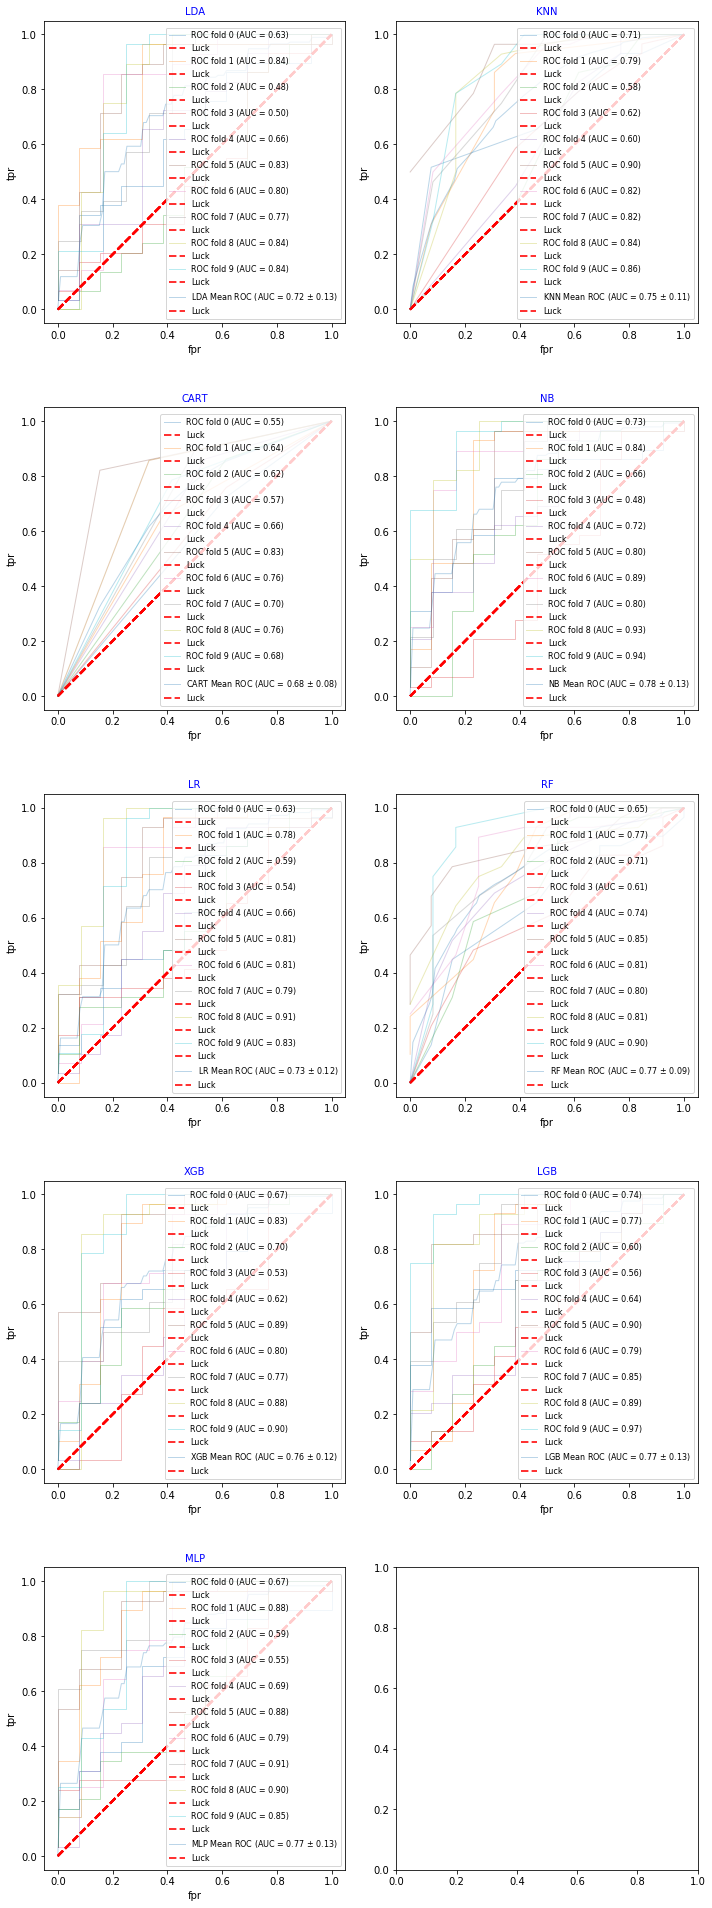

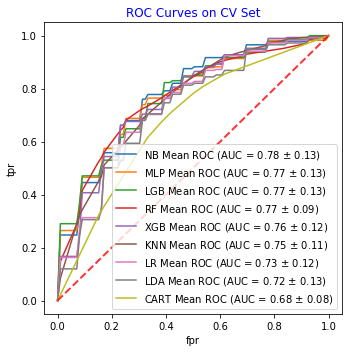

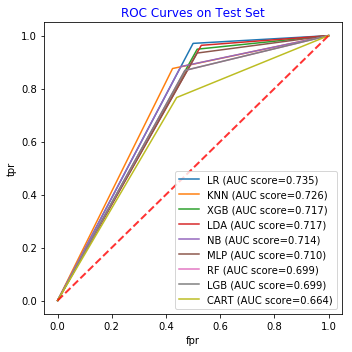

In [60]:
#features_idx = list(select_features_rfe(data_tmp, RandomForestClassifier(n_estimators=100, random_state=seed),
#                                        seed=seed, n_features=20))

y = data_tmp['y']
data_short = data_tmp.loc[:, features_names]
data_short['y'] = y
print(data_short.shape)
trainSet, testSet, y_train, y_test = ev.get_features_and_labels(data_short, seed=seed)

# Evaluate multiple classifiers on the data
print("Evaluating classifiers")
details_cv, results_cv, results_test = list(ev.eval_classifiers(trainSet, testSet, y_train, y_test, seed=seed))

# indexing results
import operator
results_cv.sort(key=operator.itemgetter(3), reverse=True)
results_test.sort(key=operator.itemgetter(3), reverse=True)
# Display the results
print("Plotting the results")
n, d = divmod(len(details_cv), 2)
n = n + 1 if d > 0 else n
fig, axis = plt.subplots(nrows=n, ncols=2, figsize=(10, 27))
axis = axis.flatten()
i = 0
for detail_cv in details_cv:
    for label, fpr, tpr, _ in detail_cv:
        axis[i].plot(fpr, tpr,  lw=1, alpha=0.3, label=label)
        axis[i].plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
                     label='Luck', alpha=.8)
        axis[i].set
        axis[i].set_xlabel('fpr', fontsize=10)
        axis[i].set_ylabel('tpr', fontsize=10)
        axis[i].set_title(label[:label.find(' ')],  fontsize=10, color="blue")
        axis[i].legend(loc='lower right', fontsize=8)

    i += 1


# Let matplotlib improve the layout

fig.tight_layout()
plt.show()
ev.plot('ROC Curves on CV Set', results_cv)
ev.plot('ROC Curves on Test Set', results_test)


# 4. Improve results
## 4.1. Algorithm Tuning

I select for tuning 3 algoritms: logistic regression, xgb and lgb

### 4.1.1 Search the space of model parameters for logistic regression




In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression()             # initialize the model
C_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
#C_range = np.arange(0.005, 0.021, 0.001)
print(C_range)
param_grid = {'C': C_range}
print("Сетка параметров:\n{}".format(param_grid)) 

grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', return_train_score=True )
grid_search.fit(trainSet, y_train)


print("Правильность на тестовом наборе: {:.3f}".format(grid_search.score(testSet, y_test))) 
best_params = grid_search.best_params_
print(best_params)

[0.001, 0.01, 0.1, 1, 10, 100, 1000]
Сетка параметров:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


Правильность на тестовом наборе: 0.793
{'C': 0.01}


In [62]:
clf_best = LogisticRegression(C=best_params['C'])
clf_best.fit(trainSet, y_train)

from sklearn.metrics import confusion_matrix 
confusion = confusion_matrix(y_test,  clf_best.predict(testSet))

print(pd.Series(y_test).value_counts(ascending=True))
print("Confusion matrix:\n{}".format(confusion)) 

print("Правильность на тестовом наборе: {:.3f}".format(clf_best.score(testSet, y_test)))


0.0     66
1.0    137
dtype: int64
Confusion matrix:
[[ 31  35]
 [  7 130]]
Правильность на тестовом наборе: 0.793


In [63]:
#Make logistic regression - based submission

lr_production = LogisticRegression(C=best_params['C'])
train_full = np.concatenate((trainSet, testSet), axis=0)
print(trainSet.shape,testSet.shape,train_full.shape)
Y_full = np.concatenate((y_train, y_test), axis=0)
print(y_train.shape,y_test.shape,Y_full.shape)
lr_production.fit(train_full, Y_full)

print(lr_production.score(testSet, y_test))

(411, 20) (203, 20) (614, 20)
(411,) (203,) (614,)
0.807881773399


In [64]:
# get_id for test
# Read test_ready set

lr_submission = pd.read_csv('data/interim/id_test.csv')

data_test = pd.read_csv('data/interim/test_ready.csv')
data_short_test = data_test.loc[:, features_names]
print(data_short_test.shape)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(np.array(data_short_test))
test_array = scaler.transform(np.array(data_short_test))
print(test_array.shape)

Y_pred = lr_production.predict(test_array)

lr_submission.insert(1, 'Loan_Status', Y_pred)
print("Loan_Status:\n",lr_submission['Loan_Status'].value_counts())
lr_submission['Loan_Status'] = lr_submission['Loan_Status'].map({0: "N", 1: "Y"})
lr_submission['Loan_ID'].astype(str)
lr_submission['Loan_Status'].astype(str)
lr_submission.to_csv('data/processed/lr_submission.csv', sep=',', index=False)

(367, 20)
(367, 20)
Loan_Status:
 1.0    307
0.0     60
Name: Loan_Status, dtype: int64


### 4.1.2 Search the space of model parameters for xgb
We will use an approach similar to that of GBM here. The various steps to be performed are:
1.	Choose a relatively high learning rate. Generally a learning rate of 0.1 works but somewhere between 0.05 to 0.3 should work for different problems. Determine the optimum number of trees for this learning rate. XGBoost has a very useful function called as “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required.
2.	Tune tree-specific parameters ( max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.
3.	Tune regularization parameters (lambda, alpha) for xgboost which can help reduce model complexity and enhance performance.
4.	Lower the learning rate and decide the optimal parameters .
Let us look at a more detailed step by step approach.

Step 1: Fix learning rate and number of estimators for tuning tree-based parameters
In order to decide on boosting parameters, we need to set some initial values of other parameters. Lets take the following values:
1.	max_depth = 5 : This should be between 3-10. I’ve started with 5 but you can choose a different number as well. 4-6 can be good starting points.
2.	min_child_weight = 1 : A smaller value is chosen because it is a highly imbalanced class problem and leaf nodes can have smaller size groups.
3.	gamma = 0 : A smaller value like 0.1-0.2 can also be chosen for starting. This will anyways be tuned later.
4.	subsample, colsample_bytree = 0.8 : This is a commonly used used start value. Typical values range between 0.5-0.9.
5.	scale_pos_weight = 1: Because of high class imbalance.
Please note that all the above are just initial estimates and will be tuned later. Lets take the default learning rate of 0.1 here and check the optimum number of trees using cv function of xgboost. The function defined above will do it for us.


In [65]:
# -----------------------------------------------------------
import os
mingw_path = 'C:\\Program Files\\Git\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
# -----------------------------------------------------------
import xgboost as xgb 

params ={'base_score': 0.5, #by default: 0.5 
         'colsample_bylevel':1, #by default: 1 
         'colsample_bytree':0.8, #by default: 1 
         'gamma':0, #by default: 0 
         'learning_rate': 0.1, #by default: 0.1 
         'max_delta_step':0, #by default: 0 
         'max_depth': 5,#by default: 3 
         'min_child_weight':0.5, #by default: 1, A smaller value is chosen because it is a highly imbalanced class problem
         'missing':None, #by default: None 
         'n_estimators':1000, #by default: 100 
         'nthread':-1,#by default: -1 
         'objective':'binary:logistic', #by default: 'binary:logistic' 
         'reg_alpha':0, #by default: 0 
         'reg_lambda':1,#by default: 1 
         'scale_pos_weight':1, #by default: 1, Because of high class imbalance.
         'seed':1234, #by default: 0
         'silent':True, #by default: True 
         'subsample':0.8} #by default: 1 

   
param_test1 = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2)
}

# initialize the model
clf = xgb.XGBClassifier(
    base_score = params['base_score'], #by default: 0.5 
    colsample_bylevel=params['colsample_bylevel'], #by default: 1 
    colsample_bytree=params['colsample_bytree'], #by default: 1 
    gamma=params['gamma'], #by default: 0 
    learning_rate = params['learning_rate'], #by default: 0.1 
    max_delta_step = params['max_delta_step'], #by default: 0 
    max_depth = params['max_depth'],#by default: 3 
    min_child_weight = params['min_child_weight'], #by default: 1, A smaller value is chosen because it is a highly imbalanced class problem
    missing = params['missing'], #by default: None 
    n_estimators =params['n_estimators'], #by default: 100 
    nthread = params['nthread'],#by default: -1 
    objective = params['objective'], #by default: 'binary:logistic' 
    reg_alpha = params['reg_alpha'], #by default: 0 
    reg_lambda = params['reg_lambda'],#by default: 1 
    scale_pos_weight = params['scale_pos_weight'], #by default: 1, Because of high class imbalance.
    seed=params['seed'], #by default: 0
    silent = params['silent'], #by default: True 
    subsample = params['subsample'] #by default: 1
)


print("Сетка параметров:\n{}".format(param_test1)) 
grid_search1 = GridSearchCV(clf, param_test1, cv=5, scoring='accuracy', return_train_score=True)
grid_search1.fit(trainSet, y_train)

print('mean:',grid_search1.cv_results_['mean_train_score'],', std: ',grid_search1.cv_results_['std_train_score'])

print("Правильность на тестовом наборе: {:.3f}".format(grid_search1.score(testSet, y_test))) 
best_params_xgb = grid_search1.best_params_
print(best_params_xgb)





Сетка параметров:
{'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)}


mean: [ 1.          0.9993921   0.99331122  1.          0.9993921   0.99331122
  1.          0.9993921   0.99270331  1.          0.9993921   0.99270331] , std:  [ 0.          0.00121581  0.00227159  0.          0.00121581  0.00227159
  0.          0.00121581  0.00242837  0.          0.00121581  0.00242837]
Правильность на тестовом наборе: 0.754
{'max_depth': 5, 'min_child_weight': 1}


In [68]:
param_test2 = {
    'max_depth': [2,3,4],
    'min_child_weight': [0,1,2]
}

print("Сетка параметров:\n{}".format(param_test2)) 
grid_search2 = GridSearchCV(clf, param_test2, cv=5, scoring='accuracy', return_train_score=True)
grid_search2.fit(trainSet, y_train)

print('mean:',grid_search2.cv_results_['mean_train_score'],', std: ',grid_search2.cv_results_['std_train_score'])

print("Правильность на тестовом наборе: {:.3f}".format(grid_search2.score(testSet, y_test))) 
best_params_xgb = grid_search2.best_params_
print(best_params_xgb)


params['max_depth'] = best_params_xgb['max_depth']
params['min_child_weight'] = best_params_xgb['min_child_weight']

#re-initialize model
clf = xgb.XGBClassifier(
    base_score = params['base_score'], #by default: 0.5 
    colsample_bylevel=params['colsample_bylevel'], #by default: 1 
    colsample_bytree=params['colsample_bytree'], #by default: 1 
    gamma=params['gamma'], #by default: 0 
    learning_rate = params['learning_rate'], #by default: 0.1 
    max_delta_step = params['max_delta_step'], #by default: 0 
    max_depth = params['max_depth'],#by default: 3 
    min_child_weight = params['min_child_weight'], #by default: 1, A smaller value is chosen because it is a highly imbalanced class problem
    missing = params['missing'], #by default: None 
    n_estimators =params['n_estimators'], #by default: 100 
    nthread = params['nthread'],#by default: -1 
    objective = params['objective'], #by default: 'binary:logistic' 
    reg_alpha = params['reg_alpha'], #by default: 0 
    reg_lambda = params['reg_lambda'],#by default: 1 
    scale_pos_weight = params['scale_pos_weight'], #by default: 1, Because of high class imbalance.
    seed=params['seed'], #by default: 0
    silent = params['silent'], #by default: True 
    subsample = params['subsample'] #by default: 1
)




Сетка параметров:
{'max_depth': [2, 3, 4], 'min_child_weight': [0, 1, 2]}


mean: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.] , std:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
Правильность на тестовом наборе: 0.744
{'max_depth': 3, 'min_child_weight': 0}


In [69]:

param_test3 = {
 'gamma':[0,0.2,0.3,0.35,0.4]
}

print("Сетка параметров:\n{}".format(param_test3)) 
grid_search3 = GridSearchCV(clf, param_test3, cv=5, scoring='accuracy', return_train_score=True)
grid_search3.fit(trainSet, y_train)

print('mean:',grid_search3.cv_results_['mean_train_score'],', std: ',grid_search3.cv_results_['std_train_score'])

print("Правильность на тестовом наборе: {:.3f}".format(grid_search3.score(testSet, y_test))) 
best_params_xgb = grid_search3.best_params_
print(best_params_xgb)


params['gamma'] = best_params_xgb['gamma']

#re-initialize model
clf = xgb.XGBClassifier(
    base_score = params['base_score'], #by default: 0.5 
    colsample_bylevel=params['colsample_bylevel'], #by default: 1 
    colsample_bytree=params['colsample_bytree'], #by default: 1 
    gamma=params['gamma'], #by default: 0 
    learning_rate = params['learning_rate'], #by default: 0.1 
    max_delta_step = params['max_delta_step'], #by default: 0 
    max_depth = params['max_depth'],#by default: 3 
    min_child_weight = params['min_child_weight'], #by default: 1, A smaller value is chosen because it is a highly imbalanced class problem
    missing = params['missing'], #by default: None 
    n_estimators =params['n_estimators'], #by default: 100 
    nthread = params['nthread'],#by default: -1 
    objective = params['objective'], #by default: 'binary:logistic' 
    reg_alpha = params['reg_alpha'], #by default: 0 
    reg_lambda = params['reg_lambda'],#by default: 1 
    scale_pos_weight = params['scale_pos_weight'], #by default: 1, Because of high class imbalance.
    seed=params['seed'], #by default: 0
    silent = params['silent'], #by default: True 
    subsample = params['subsample'] #by default: 1
)

Сетка параметров:
{'gamma': [0, 0.2, 0.3, 0.35, 0.4]}


mean: [ 1.  1.  1.  1.  1.] , std:  [ 0.  0.  0.  0.  0.]
Правильность на тестовом наборе: 0.729
{'gamma': 0.35}


In [70]:
param_test4 = {
'colsample_bytree':[i/10.0 for i in range(2,6)], 
'subsample':[i/10.0 for i in range(2,6)]
 
}

print("Сетка параметров:\n{}".format(param_test4)) 
grid_search4 = GridSearchCV(clf, param_test4, cv=5, scoring='accuracy', return_train_score=True)
grid_search4.fit(trainSet, y_train)

print('mean:',grid_search4.cv_results_['mean_train_score'],', std: ',grid_search4.cv_results_['std_train_score'])

print("Правильность на тестовом наборе: {:.3f}".format(grid_search4.score(testSet, y_test))) 
best_params_xgb = grid_search4.best_params_
print(best_params_xgb)

params['subsample'] = best_params_xgb['subsample']
params['colsample_bytree'] = best_params_xgb['colsample_bytree']

#re-initialize model
clf = xgb.XGBClassifier(
    base_score = params['base_score'], #by default: 0.5 
    colsample_bylevel=params['colsample_bylevel'], #by default: 1 
    colsample_bytree=params['colsample_bytree'], #by default: 1 
    gamma=params['gamma'], #by default: 0 
    learning_rate = params['learning_rate'], #by default: 0.1 
    max_delta_step = params['max_delta_step'], #by default: 0 
    max_depth = params['max_depth'],#by default: 3 
    min_child_weight = params['min_child_weight'], #by default: 1, A smaller value is chosen because it is a highly imbalanced class problem
    missing = params['missing'], #by default: None 
    n_estimators =params['n_estimators'], #by default: 100 
    nthread = params['nthread'],#by default: -1 
    objective = params['objective'], #by default: 'binary:logistic' 
    reg_alpha = params['reg_alpha'], #by default: 0 
    reg_lambda = params['reg_lambda'],#by default: 1 
    scale_pos_weight = params['scale_pos_weight'], #by default: 1, Because of high class imbalance.
    seed=params['seed'], #by default: 0
    silent = params['silent'], #by default: True 
    subsample = params['subsample'] #by default: 1
)

Сетка параметров:
{'colsample_bytree': [0.2, 0.3, 0.4, 0.5], 'subsample': [0.2, 0.3, 0.4, 0.5]}


mean: [ 0.99756468  1.          1.          1.          0.99817444  1.          1.
  1.          0.99817444  1.          1.          1.          0.99817444
  1.          1.          1.        ] , std:  [ 0.00228051  0.          0.          0.          0.00243254  0.          0.
  0.          0.00149057  0.          0.          0.          0.00149057
  0.          0.          0.        ]
Правильность на тестовом наборе: 0.764
{'colsample_bytree': 0.5, 'subsample': 0.5}


In [71]:
param_test5 = {
 'colsample_bytree':[0.4,0.5,0.6],
 'subsample':[0.4,0.5,0.6]
}
print("Сетка параметров:\n{}".format(param_test5)) 
grid_search5 = GridSearchCV(clf, param_test5, cv=5, scoring='accuracy', return_train_score=True)
grid_search5.fit(trainSet, y_train)

print('mean:',grid_search5.cv_results_['mean_train_score'],', std: ',grid_search5.cv_results_['std_train_score'])

print("Правильность на тестовом наборе: {:.3f}".format(grid_search5.score(testSet, y_test))) 
best_params_xgb = grid_search5.best_params_
print(best_params_xgb)

params['subsample'] = best_params_xgb['subsample']
params['colsample_bytree'] = best_params_xgb['colsample_bytree']

#re-initialize model
clf = xgb.XGBClassifier(
    base_score = params['base_score'], #by default: 0.5 
    colsample_bylevel=params['colsample_bylevel'], #by default: 1 
    colsample_bytree=params['colsample_bytree'], #by default: 1 
    gamma=params['gamma'], #by default: 0 
    learning_rate = params['learning_rate'], #by default: 0.1 
    max_delta_step = params['max_delta_step'], #by default: 0 
    max_depth = params['max_depth'],#by default: 3 
    min_child_weight = params['min_child_weight'], #by default: 1, A smaller value is chosen because it is a highly imbalanced class problem
    missing = params['missing'], #by default: None 
    n_estimators =params['n_estimators'], #by default: 100 
    nthread = params['nthread'],#by default: -1 
    objective = params['objective'], #by default: 'binary:logistic' 
    reg_alpha = params['reg_alpha'], #by default: 0 
    reg_lambda = params['reg_lambda'],#by default: 1 
    scale_pos_weight = params['scale_pos_weight'], #by default: 1, Because of high class imbalance.
    seed=params['seed'], #by default: 0
    silent = params['silent'], #by default: True 
    subsample = params['subsample'] #by default: 1
)


Сетка параметров:
{'colsample_bytree': [0.4, 0.5, 0.6], 'subsample': [0.4, 0.5, 0.6]}


mean: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.] , std:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
Правильность на тестовом наборе: 0.764
{'colsample_bytree': 0.5, 'subsample': 0.5}


In [72]:
param_test6 = {
 'reg_alpha':[0,1e-6,1e-5, 1e-2, 0.1, 1, 100]
}
print("Сетка параметров:\n{}".format(param_test6)) 
grid_search6 = GridSearchCV(clf, param_test6, cv=5, scoring='accuracy', return_train_score=True)
grid_search6.fit(trainSet, y_train)

print('mean:',grid_search6.cv_results_['mean_train_score'],', std: ',grid_search6.cv_results_['std_train_score'])

print("Правильность на тестовом наборе: {:.3f}".format(grid_search6.score(testSet, y_test))) 
best_params_xgb = grid_search6.best_params_
print(best_params_xgb)

params['reg_alpha'] = best_params_xgb['reg_alpha']

#re-initialize model
clf = xgb.XGBClassifier(
    base_score = params['base_score'], #by default: 0.5 
    colsample_bylevel=params['colsample_bylevel'], #by default: 1 
    colsample_bytree=params['colsample_bytree'], #by default: 1 
    gamma=params['gamma'], #by default: 0 
    learning_rate = params['learning_rate'], #by default: 0.1 
    max_delta_step = params['max_delta_step'], #by default: 0 
    max_depth = params['max_depth'],#by default: 3 
    min_child_weight = params['min_child_weight'], #by default: 1, A smaller value is chosen because it is a highly imbalanced class problem
    missing = params['missing'], #by default: None 
    n_estimators =params['n_estimators'], #by default: 100 
    nthread = params['nthread'],#by default: -1 
    objective = params['objective'], #by default: 'binary:logistic' 
    reg_alpha = params['reg_alpha'], #by default: 0 
    reg_lambda = params['reg_lambda'],#by default: 1 
    scale_pos_weight = params['scale_pos_weight'], #by default: 1, Because of high class imbalance.
    seed=params['seed'], #by default: 0
    silent = params['silent'], #by default: True 
    subsample = params['subsample'] #by default: 1
)



Сетка параметров:
{'reg_alpha': [0, 1e-06, 1e-05, 0.01, 0.1, 1, 100]}


mean: [ 1.          1.          1.          1.          1.          0.99695863
  0.30656831] , std:  [ 0.          0.          0.          0.          0.          0.00332962
  0.00084513]
Правильность на тестовом наборе: 0.764
{'reg_alpha': 0}


In [73]:

param_test7 = {
   'learning_rate':[0.001,0.01,0.05],
   'n_estimators':[2500,3000,3500]
}

print("Сетка параметров:\n{}".format(param_test7)) 
grid_search7 = GridSearchCV(clf, param_test7, cv=5, scoring='accuracy', return_train_score=True)
grid_search7.fit(trainSet, y_train)

print('mean:',grid_search7.cv_results_['mean_train_score'],', std: ',grid_search7.cv_results_['std_train_score'])

print("Правильность на тестовом наборе: {:.3f}".format(grid_search7.score(testSet, y_test))) 
best_params_xgb = grid_search7.best_params_
print(best_params_xgb)


params['learning_rate']= best_params_xgb['learning_rate']
params['n_estimators']= best_params_xgb['n_estimators']
#re-initialize model
clf = xgb.XGBClassifier(
    base_score = params['base_score'], #by default: 0.5 
    colsample_bylevel=params['colsample_bylevel'], #by default: 1 
    colsample_bytree=params['colsample_bytree'], #by default: 1 
    gamma=params['gamma'], #by default: 0 
    learning_rate = params['learning_rate'], #by default: 0.1 
    max_delta_step = params['max_delta_step'], #by default: 0 
    max_depth = params['max_depth'],#by default: 3 
    min_child_weight = params['min_child_weight'], #by default: 1, A smaller value is chosen because it is a highly imbalanced class problem
    missing = params['missing'], #by default: None 
    n_estimators =params['n_estimators'], #by default: 100 
    nthread = params['nthread'],#by default: -1 
    objective = params['objective'], #by default: 'binary:logistic' 
    reg_alpha = params['reg_alpha'], #by default: 0 
    reg_lambda = params['reg_lambda'],#by default: 1 
    scale_pos_weight = params['scale_pos_weight'], #by default: 1, Because of high class imbalance.
    seed=params['seed'], #by default: 0
    silent = params['silent'], #by default: True 
    subsample = params['subsample'] #by default: 1
)



Сетка параметров:
{'learning_rate': [0.001, 0.01, 0.05], 'n_estimators': [2500, 3000, 3500]}


mean: [ 0.85279302  0.85644043  0.86252502  0.99817444  1.          1.          1.
  1.          1.        ] , std:  [ 0.00961447  0.00980224  0.00855791  0.00149057  0.          0.          0.
  0.          0.        ]
Правильность на тестовом наборе: 0.803
{'learning_rate': 0.001, 'n_estimators': 2500}


In [81]:
print('Finally tuned xgb parameters:\n',clf.get_params())


Finally tuned xgb parameters:
 {'base_score': 0.5, 'colsample_bylevel': 1, 'colsample_bytree': 0.5, 'gamma': 0.35, 'learning_rate': 0.001, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 0, 'missing': None, 'n_estimators': 2500, 'nthread': -1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 1234, 'silent': True, 'subsample': 0.5}


In [78]:
#Make xgbm - based submission
              
train_full = np.concatenate((trainSet, testSet), axis=0)
print(trainSet.shape,testSet.shape,train_full.shape)
Y_full = np.concatenate((y_train, y_test), axis=0)
print(y_train.shape,y_test.shape,Y_full.shape)

xgb_production = clf.fit(train_full,Y_full)
print(xgb_production.score(testSet, y_test))



(411, 20) (203, 20) (614, 20)
(411,) (203,) (614,)


f5     1286
f2     1252
f1     1215
f3     1191
f10    1006
f4      976
f8      970
f6      874
f9      831
f0      760
f7      720
f16     627
f13     508
f12     453
f14     442
f18     413
f19     353
f17     313
f11     308
f15     259
dtype: int64
0.84236453202


In [82]:
# get_id for test
# Read test_ready set

xgb_submission = pd.read_csv('data/interim/id_test.csv')

data_test = pd.read_csv('data/interim/test_ready.csv')
data_short_test = data_test.loc[:, features_names]
print(data_short_test.shape)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(np.array(data_short_test))
test_array = scaler.transform(np.array(data_short_test))
print(test_array.shape)

Y_pred = xgb_production.predict(test_array)

xgb_submission.insert(1, 'Loan_Status', np.int32(Y_pred))
print("Loan_Status:\n",xgb_submission['Loan_Status'].value_counts())
xgb_submission['Loan_Status'] = xgb_submission['Loan_Status'].map({0: "N", 1: "Y"})
xgb_submission['Loan_ID'].astype(str)
xgb_submission['Loan_Status'].astype(str)
xgb_submission.to_csv('data/processed/xgb_submission.csv', sep=',', index=False)

#Final xgb submission Правильность на тестовом наборе: 0.803	0.777777777777778	

(367, 20)
(367, 20)
Loan_Status:
 1    306
0     61
Name: Loan_Status, dtype: int64


### 4.1.3 Search the space of model parameters for xgb

In [25]:
import lightgbm as lgb

## Set params
# Scores ~0.784 (without tuning and early stopping)    
params = {'boosting_type': 'gbdt',
          'max_depth': -1,
          'objective': 'binary', 
          'n_jobs': 5, # Updated from nthread
          'num_leaves': 64, 
          'learning_rate': 0.05, 
          'max_bin': 512, 
          'subsample_for_bin': 200,
          'subsample': 1, 
          'subsample_freq': 1, 
          'colsample_bytree': 0.8, 
          'reg_alpha': 5, 
          'reg_lambda': 10,
          'min_split_gain': 0.5, 
          'min_child_weight': 1, 
          'min_child_samples': 5, 
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'}

# Create parameters to search
gridParams = {
    'learning_rate': [0.05],
    'n_estimators': [10,100,1000],
    'num_leaves': [2,3,4,6,8,12,16],
    'random_state' : [501], # Updated from 'seed'
    'colsample_bytree' : [0.5, 0.6, 0.7],
    'subsample' : [0.5,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

# Create classifier to use. Note that parameters have to be input manually
# not as a dict!
gbm = lgb.LGBMClassifier(boosting_type='gbdt', 
                          objective='binary', 
                          n_jobs=5,# Updated from 'nthread' 
                          silent=True,
                          max_depth=params['max_depth'],
                          max_bin=params['max_bin'],
                          subsample_for_bin=params['subsample_for_bin'],
                          subsample=params['subsample'],
                          subsample_freq = params['subsample_freq'],
                          min_split_gain = params['min_split_gain'],
                          min_child_weight = params['min_child_weight'],
                          min_child_samples = params['min_child_samples'],
                          scale_pos_weight = params['scale_pos_weight'])

# To view the default model params:
gbm.get_params().keys()

# Create the grid
grid = GridSearchCV(gbm, gridParams, verbose=1, cv=5, n_jobs=1)
# Run the grid
grid.fit(trainSet, y_train)

# Print the best parameters found
best_params_lgb = grid.best_params_
print(grid.best_params_)
print(grid.best_score_)



# Using parameters already set above, replace in the best from the grid search
params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['learning_rate'] = grid.best_params_['learning_rate'] 
# params['max_bin'] = grid.best_params_['max_bin']
params['num_leaves'] = grid.best_params_['num_leaves']
params['reg_alpha'] = grid.best_params_['reg_alpha']
params['reg_lambda'] = grid.best_params_['reg_lambda']
params['subsample'] = grid.best_params_['subsample']
# params['subsample_for_bin'] = grid.best_params_['subsample_for_bin']

print('Fitting with params: ')
print(params)

Fitting 5 folds for each of 756 candidates, totalling 3780 fits


{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'n_estimators': 10, 'num_leaves': 6, 'random_state': 501, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.5}
0.8199513382
Fitting with params: 
{'boosting_type': 'gbdt', 'max_depth': -1, 'objective': 'binary', 'n_jobs': 5, 'num_leaves': 6, 'learning_rate': 0.05, 'max_bin': 512, 'subsample_for_bin': 200, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.5, 'reg_alpha': 1, 'reg_lambda': 1, 'min_split_gain': 0.5, 'min_child_weight': 1, 'min_child_samples': 5, 'scale_pos_weight': 1, 'num_class': 1, 'metric': 'binary_error'}


[Parallel(n_jobs=1)]: Done 3780 out of 3780 | elapsed:  8.1min finished


In [30]:
#Make lightGBM- based submission
              
train_full = np.concatenate((trainSet, testSet), axis=0)
print(trainSet.shape,testSet.shape,train_full.shape)
Y_full = np.concatenate((y_train, y_test), axis=0)
print(y_train.shape,y_test.shape,Y_full.shape)

full_dataset = lgb.Dataset(train_full, label=Y_full)

gbm_production = lgb.train(params=best_params_lgb,
                           train_set=full_dataset,
                           verbose_eval=4)
                           
# Plot importance
lgb.plot_importance(gbm)
plt.show()
# 
# print(gbm_production.score(testSet, y_test))



(411, 15) (203, 15) (614, 15)
(411,) (203,) (614,)


NotFittedError: No booster found. Need to call fit beforehand.

In [1]:
# get_id for test
# Read test_ready set

gbm_submission = pd.read_csv('data/interim/id_test.csv')

data_test = pd.read_csv('data/interim/test_ready.csv')
data_short_test = data_test.loc[:, features_names]
print(data_short_test.shape)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(np.array(data_short_test))
test_array = scaler.transform(np.array(data_short_test))
print(test_array.shape)

Y_pred = gbm_production.predict(test_array)

gbm_submission.insert(1, 'Loan_Status', np.int32(Y_pred))
print("Loan_Status:\n",gbm_submission['Loan_Status'].value_counts())
gbm_submission['Loan_Status'] = gbm_submission['Loan_Status'].map({0: "N", 1: "Y"})
gbm_submission['Loan_ID'].astype(str)
gbm_submission['Loan_Status'].astype(str)
gbm_submission.to_csv('data/processed/gbm_submission.csv', sep=',', index=False)


NameError: name 'pd' is not defined